# Introdução a Geopandas


## Baixando os dados

Para esta lição vamos usar o conjunto de dados das fronteiras do continente europeu no formato Shapefile. 

Primeiramente vamos fazer download dos dados, e vamos fazer isso utilizando o terminal:

Vamos baixar os [dados](https://github.com/AutoGIS/data/raw/master/L2_data.zip) com o comando
`wget` (para MacOS use `curl -O`). Baixe os dados na pasta do nosso projeto executando o seguinte comando no terminal  (caso não saiba como abrir o terminal [veja aqui](https://jupyterlab.readthedocs.io/en/stable/user/terminal.html)):

```
# Mude o diretório para a pasta Lesson 2
$ cd /home/carlos/Data-Science/AutoGIS/Leasson\ 2/
$ wget https://github.com/AutoGIS/data/raw/master/L2_data.zip
    
```
*Dica: você pode copiar e colar coisa para o terminal do JupyterLab pressionando SHIFT + RIGHT-CLICK com o seu mouse e selecionando 'Paste'.*

Depois de ter baixado os dados `L2_data.zip` para o seu diretório, você pode descompactar os arquivos usando o comando `unzip` pelo terminal (ou 7zip utilizando windows). Os comandos a seguir assumem que você baixou os dados no diretório `/home/carlos/Data-Science/AutoGIS/Leasson\ 2/`:

``` 
$ cd /home/carlos/Data-Science/AutoGIS/Leasson\ 2/
$ unzip L2_data.zip
$ ls L2_data

Europe_borders.dbf  Europe_borders.sbx   Europe_borders.prj  Europe_borders.shpEurope_borders.cpg  Europe_borders.sbn  Europe_borders.shx
```
Como podemos ver a pasta `L2_data` incluem arquivos no formato Shapefile nomeados de `Europe_borders.shp`. Perceba que os arquivos Shapefile são constituidos de muitos arquivos separados, como ´.dbf´ que contém informações dos atributos, o arquivo '.prj' que contém informações sobre coordenada do sistema de referência. 

## Lendo arquivos Shapefile

Tipicamente o primeiro passo para fazer uma análise em python consiste em carregar os dados. Para sistemas GIS existem vários tipos de formatos como [Shapefile](https://en.wikipedia.org/wiki/Shapefile), [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON), [KML](https://en.wikipedia.org/wiki/Keyhole_Markup_Language), e [GPKG](https://en.wikipedia.org/wiki/GeoPackage) que são os mais comuns. 

O [Geopandas](http://geopandas.org/io.html) é capaz de ler de todos estes formatos e muitos outros. Ler dados espaciais pode ser feito facilmente com o Geopandas usando a função `gpd.from_file()`.

Você pode instalar o geopandas no nosso ambiente, utilizando o seguinte comando: conda install geopandas

In [10]:
# Import necessary modules
import geopandas as gpd

# Set filepath 
fp = "data/Europe_borders.shp"

# Read file using gpd.read_file()
data = gpd.read_file(fp)

Agora que o arquivo shapefile foi lido na variável `data`, vamos ver o seu formato:

In [11]:
type(data)

geopandas.geodataframe.GeoDataFrame

Podemos ver o que o tipo do arquivo é um `GeoDataFrame`. O objeto GeoDataFrame as funcionalidades do `pandas.DataFrame` de uma maneira que é possível usar dados espaciais usando abordagens semelhantes e estruturas de dados como no Pandas (por isso o nome Geopandas). O GeoDataFrame possui algumas características especiais e funções que são bastante úteis para análises GIS.

- Vamos dar uma olhada nos nosso dados, mostrando as duas primeiras linhas utilizando a função `head()`.

In [17]:
print(data.head(2))

            TZID                                           geometry
0  Europe/Berlin  POLYGON ((8.457777976989746 54.56236267089844,...
1  Europe/Berlin  POLYGON ((8.71992015838623 47.69664382934571, ...


Quando utilizamos dados espaciais, é uma boa ideia explorar seus dados utilizando um mapa. Criar um mapa simples de um `GeoDataFrame` é muito fácil: você pode utilizar a função ``.plot()`` que cria um mapa baseado nas geometrias dos dados. Na verdade o Geopandas utiliza o  Matplotlib para criar os mapas.

- Vamos testar a função ``.plot()`` e ver como os nosso dados se parecem em um mapa.

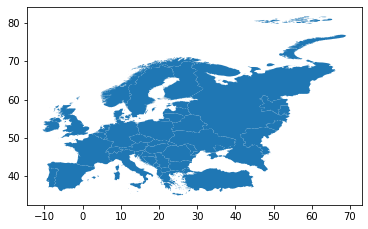

In [19]:
data.plot()

Como podemos ver, é realmente muitio fácil produzir um mapa de um arquivo shapeFile utilizando o geopandas. O módulo automáticamente posiciona seu mapa de uma forma que todos os dados são inseridos.

## Escrevendo um Shapefile

Escrever os dados espaciais no disco, por exemplo, como um novo arquivo Shapefle é também uma função muito utilizada.

- Vamos selecionar apenas as 50 primeiras linhas dos nossos dados e escrever em um novo arquivo Shapefile utilizando a função ``gpd.to_file()``.

In [22]:
# Create a output path for the data
outfp = "data/Europe_borders_SELECTION.shp"

# Select first 50 rows
selection = data[0:50]

# Write those rows into a new Shapefile (the default output file format is Shapefile)
selection.to_file(outfp)

**TAREFA:** Vamos ler o novo arquivo Shapefile criado e ver como os dados se parecem.

In [26]:
## CODE HERE ##

## Geometrias no Geopandas

O geopandas tira vantagem das geometrias do modulo Shapely que usamos anteriormente. As geometrias são armazenadas em uma coluna chamado *geometry* que é um nome padrão para armazenar as informações de geometria no geopandas.

- Vamos ver os 5 primeiros dados da coluna 'geometry':

In [27]:
# It is possible to get a specific column by specifying the column name within square brackets []
print(data['geometry'].head(5))

0    POLYGON ((8.457777976989746 54.56236267089844,...
1    POLYGON ((8.71992015838623 47.69664382934571, ...
2    POLYGON ((6.733166694641113 53.5740852355957, ...
3    POLYGON ((6.858222007751465 53.59411239624024,...
4    POLYGON ((6.89894437789917 53.6256103515625, 6...
Name: geometry, dtype: object


Como podemos ver a coluna `geometry` contém valores familiares, que são basicamente os objetos `Polygons` que usamos anteriormente do módulo Shapely. Desde que os dados espaciais estão armazenados em objetos Shapely, **logo é possível usar todas as funcionalidades do módulo Shapely**.

- Vamos testar essa funcionalidade, percorrendo por nossos dados e mostrando a `area` dos cinco primeiros Polygons.
  - Nós podemos percorrer as linhas dos nossos dataset usando a função `iterrows()`

In [31]:
# Make a selection that contains only the first five rows
selection = data[0:5]

# Iterate over rows and print the area of a Polygon
for index, row in selection.iterrows():
    # Get the area of the polygon
    poly_area = row['geometry'].area
    # Print information for the user
    print("Polygon area at index {index} is: {area:.5f}".format(index=index, area=poly_area))

Polygon area at index 0 is: 0.00034
Polygon area at index 1 is: 0.00089
Polygon area at index 2 is: 0.00423
Polygon area at index 3 is: 0.00010
Polygon area at index 4 is: 0.00107


Como você pode observar, todas as funcionalidade do **Pandas**, como a função `iterrows()` estão diretamente disponíveis no Geopandas sem precisar chamadar o pandas diretamente, isso porque o Geopandas é uma **extensão** do Pandas.

- Vamos criar um nova coluna no nosso GeoDataFrame em que nós calculamos e armazenamos as áreas dos polígonos individualmente em uma nova coluna. Calcular a área dos nosso polygons é muito fácil no geopandas usando o atributo ``GeoDataFrame.area``, desde que não preciso percorrer todos os dados linha por linha, como fizemos anteriormente.

In [34]:
# Create a new column called 'area' and assign the area of the Polygons into it
data['area'] = data.area

# Print first 5 rows of the data
print(data.head(5))

            TZID                                           geometry      area
0  Europe/Berlin  POLYGON ((8.457777976989746 54.56236267089844,...  0.000341
1  Europe/Berlin  POLYGON ((8.71992015838623 47.69664382934571, ...  0.000886
2  Europe/Berlin  POLYGON ((6.733166694641113 53.5740852355957, ...  0.004234
3  Europe/Berlin  POLYGON ((6.858222007751465 53.59411239624024,...  0.000101
4  Europe/Berlin  POLYGON ((6.89894437789917 53.6256103515625, 6...  0.001072


Como podemos ver o nosso dataset ganhou uma nova coluna com nome `area` em que foram armazenadas as áreas de cada polígono.

- Vamos também checar outras funções como `min`, `max` e `mean` que são funções bem familiares do pandas.

In [38]:
# Maximum area
max_area = data['area'].max()

# Minimum area
min_area = data['area'].min()

# Mean area
mean_area = data['area'].mean()

print("Max area: {max}\nMin area: {min}\nMean area: {mean}".format(max=round(max_area, 3), min=round(min_area, 3), mean=round(mean_area, 2)))

Max area: 464.717
Min area: 0.0
Mean area: 0.39


O polígono com maior área no nosso dataset apresenta 464 graus decimais quadrados (~ 51652 km2), e  na média obtemos 0.39 graus, e o mínimo 0.0, isto porque existem polígonos realmente muito pequenos nos nosso dados (entre 0 e 2 graus).

## Criando geometrias para um GeoDataFrame

Desde que o geopandas tira vantagem dos objetos do módulo shapely, é possível criar um Shapefile do zero, passando objetos geometricos para um GeoDataFrame. Isto é útil, por exemplo, para facilitar a conversão de coordenadas em um arquivo de texto para um Shapefile. em seguida vamos ver como isto pode ser feito.

- Vamos primeiro criar um `GeoDataFrame` vázio.

In [39]:
# Import necessary modules first
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Create an empty geopandas GeoDataFrame
newdata = gpd.GeoDataFrame()

# Let's see what we have at the moment
print(newdata)

Empty GeoDataFrame
Columns: []
Index: []


como pode ser observado, o GeoDataFrame está vázio, desde de que ainda não armazenamos nenhum dado nele.

- Agora vamos criar uma nova coluna chamada `geometry` que armazenará os nosso objetos geometricos.

In [40]:
# Create a new column called 'geometry' to the GeoDataFrame
newdata['geometry'] = None

# Let's again see what's inside
print(newdata)

Empty GeoDataFrame
Columns: [geometry]
Index: []


Agora temos a colina `geometry` no nosso GeoDataFrame, mas não temos nenhum dado armazenado ainda.

- Vamos criar um `Polygon` representando a Praça do Senado de Helsinque, que posteriormente vamos adicionar ao nosso GeoDataFrame:

In [41]:
# Coordinates of the Helsinki Senate square in Decimal Degrees
coordinates = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]

# Create a Shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)

# Let's see what we have
print(poly)

POLYGON ((24.950899 60.169158, 24.953492 60.169158, 24.95351 60.170104, 24.950958 60.16999, 24.950899 60.169158))


Agora que temos no objeto `Polygon`, vamos inseri-lo na coluna ´geoemtry´ do nosso GeoDataFrame, na posição 0:

In [42]:
# Insert the polygon into 'geometry' -column at index 0
newdata.loc[0, 'geometry'] = poly

# Let's see what we have now
print(newdata)

                                            geometry
0  POLYGON ((24.950899 60.169158, 24.953492 60.16...


Legal, agora nós temos um GeoDataFrame com um polígono que já podemos exportar para um arquivo shapefile. Porém, geralmente podemos querer adicionar mais informações as nossas geometrias.

- Antes de salvar o nosso novo dataframe,  vamos adicionar uma nova coluna chamada de `location` com o texto `Senaatintori`, que descreve o local que representa a geometria. 

In [43]:
# Add a new column and insert data 
newdata.loc[0, 'location'] = 'Senaatintori'

# Let's check the data
print(newdata)

                                            geometry      location
0  POLYGON ((24.950899 60.169158, 24.953492 60.16...  Senaatintori


Certo, agora temos informações adicionais para reconhecer o que a nosa geoemtria representa.

Antes de exportar os nossos dados é um  boa ideia determinar o **sistema de referência de coordenadas (projeção) do nosso GeoDataFrame.**. Para isso, nós podemos utilizar o atributo `.crs` que mostra o sistema de coordenadas dos dados, que no nosso caso vai estar vázio, pois estamos criando um GeoDataFrame do zero.

Veremos mais sobre projeção logo em seguida.

- Verifique a projeção do nosso recém criado GeoDataFrame


In [44]:
print(newdata.crs)

None


- Vamos adicionar um crs para o nosso GeoDataFrame. Um modulo em python chamado de **fiona** possui uma ótima função chamada de ``from_epsg()`` para passar informação de projeção para o GeoDataFrame. em seguida, vamos usar esta função e determinara a projeção para WGS84 (código epsg: 4326):

In [45]:
# Import specific function 'from_epsg' from fiona module
from fiona.crs import from_epsg

# Set the GeoDataFrame's coordinate system to WGS84 (i.e. epsg code 4326)
newdata.crs = from_epsg(4326)

# Let's see how the crs definition looks like
print(newdata.crs)

{'init': 'epsg:4326', 'no_defs': True}


Como podemos ver, agora nós possuimos um sistema de referência de coordenadas (CRS) no nosso 
`GeoDataFrame`. A informação de CRS aqui é um dicionário em python contendo os valores necessários para o geopandas criar um arquivo `.prj` para o nosso Shapefile, que contém as informações de CRS.

- Finalmente, podemos exportar o nosso GeoDataFrame utilizando a função `.to_file()`. A função funciona basicamente como as funções de exportação do numpy ou pandas, mas aqui precisamos apenas especificar o caminho no qual o nosso shapefile será salvo:

In [46]:
# Determine the output path for the Shapefile
outfp = "data/Senaatintori.shp"

# Write the data into that Shapefile
newdata.to_file(outfp)

## Resumo

Neste tutorial nós introduzimos os primeiros passaos para usar geopandas. Mais especificamente 
voce deve ter aprendido a fazer:

**1)** Ler dados de Shapefile usando geopandas,

**2)** Escrever dados GeoDataFrame de Shapefile usando geopandas,

**3)** criar um GeoDataFrame do zero.